In [18]:
# Импортируем нужные нам библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, mean_absolute_percentage_error
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [19]:
# Загружаем датасет, с которым мы будем работать
df = pd.read_csv('bike-sharing.csv')

In [20]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


In [21]:
df = df[['dteday', 'cnt']]

In [22]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [23]:
df.set_index('dteday',inplace=True)

In [24]:
df = df.resample('W').mean()

<AxesSubplot:xlabel='dteday'>

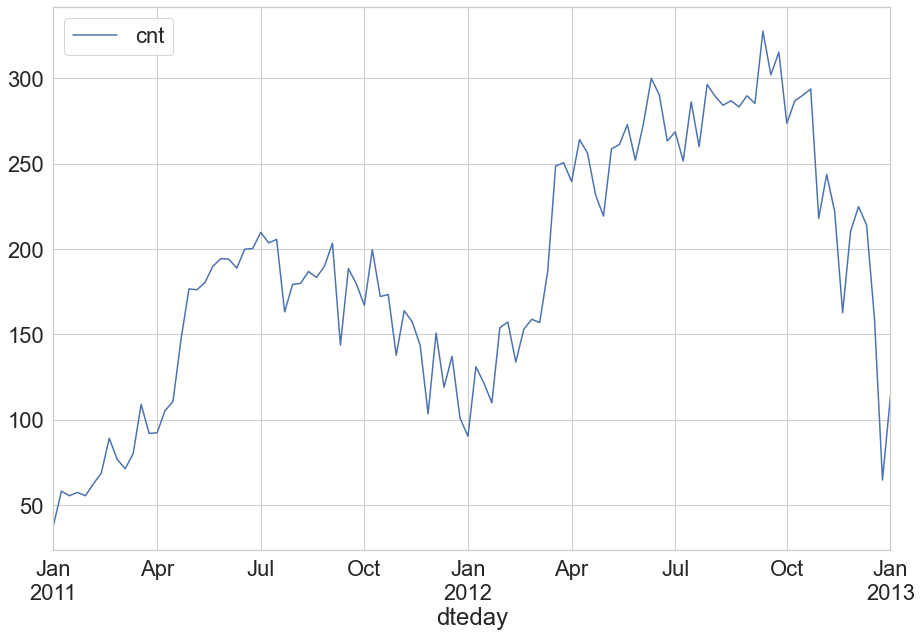

In [25]:
df.plot()

In [26]:
val = pd.Series(index = df.index, data = df['cnt'].values)

In [34]:
y_pred = list()
y_pred.append(np.nan)

In [37]:
for i in range(1, len(val)):
    y_pred.append(val.values[i - 1])

In [38]:
val_pred = pd.Series(index = val.index, data = y_pred)

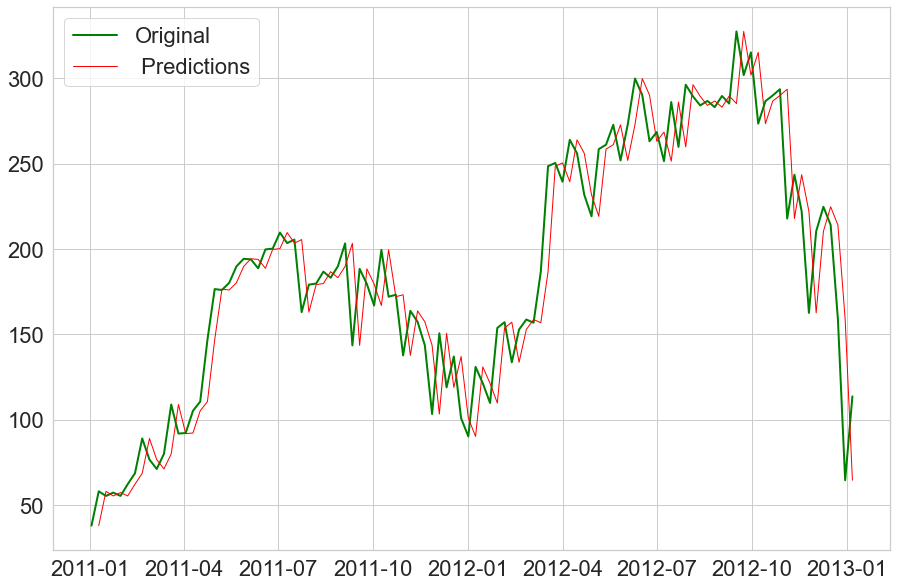

In [39]:
fig, ax = plt.subplots()
ax.plot(val, linewidth = 2, color='green',label = 'Original')
ax.plot(val_pred, linewidth = 1, color = 'red', label =' Predictions')
ax.legend()
plt.show()

In [40]:
df['pred'] = val_pred
df.dropna(inplace=True)

In [41]:
print('MSE =', mean_squared_error(df['cnt'],df['pred']))
print('MAE =', mean_absolute_error(df['cnt'],df['pred']))
print('R2 =', r2_score(df['cnt'],df['pred']))
print('MRSE =', mean_absolute_percentage_error(df['cnt'],df['pred']))

MSE = 711.0153102376978
MAE = 19.555469639051964
R2 = 0.8632639809826389
MRSE = 0.12681208262840363
